# Transforms vs Other Factors, Transforms-2D Eval

In [1]:
from lib_project.notebook import setup_notebook
setup_notebook("../../../")

%load_ext autoreload
%autoreload 2

In [6]:
from pathlib import Path

from IPython.display import display, Markdown as md

from experiments.transforms_vs_other import results as res_util

In [3]:
display(md(f"experiments/{res_util.EXP_NAME}/README.md"))

# Transforms vs Other Factors

This experiment investigates how important training a model on data with the same transformations as the target task (i.e. to have the same invariances) is compared to other pre-training factors for transfer learning.
To do this, two sets of models are trained using the Transforms2D dataset.
In one case the training data is generated with the same transformations as the target/test dataset, and in the second case a disjoint set of transformations is used.
For example, if in the target task samples are generated by transforming objects by translation, color jittering and blurring, then one set of models is trained with these transformations, whereas the other set might use for example rotations, contrast changes and noise artifacts.

Both sets of models are trained by varying some other potentially important pre-trianing parameter, such as the number of training examples, the model architecture or the relationship of the classes in the training dataset with those in the target dataset (subset, same, disjoint, superset).


In [4]:
VAR_CAT_DESCRIPTIONS = {
    "class_rel": "Compares the effect of same-vs-different transformations with the effect of the class-relationship of the training task to target task: subset (10 out of 30), same, disjoint (different 30), superset (60 compared to 30).",
    "arch": "Compares the effect of same-vs-different transformations with the effect of the model architecture.",
    "pt_samples": "Compares the effect of same-vs-different transformations with the effect of the number of pretraining samples on transfer performance.",
    "ft_samples": "Compares the effect of same-vs-different transformations with the effect of the number of transer samples on transfer performance.",
}

## Linear-probing

Freeze the backbone and only fine-tune the last linear output layer (linear-probing).
We use 50,000 FT-samples.

### Transforms vs Class Rel.

Compares the effect of same-vs-different transformations with the effect of the class-relationship of the training task to target task: subset (10 out of 30), same, disjoint (different 30), superset (60 compared to 30).

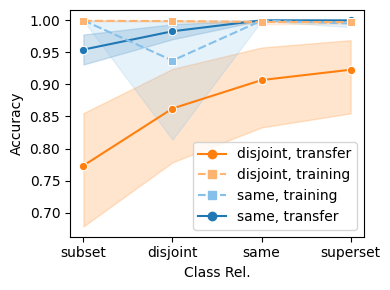

### Transforms vs Architecture

Compares the effect of same-vs-different transformations with the effect of the model architecture.

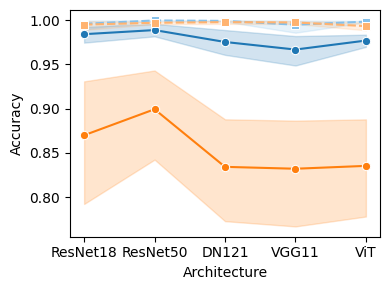

<Figure size 300x200 with 0 Axes>

### Transforms vs PT Samples

Compares the effect of same-vs-different transformations with the effect of the number of pretraining samples on transfer performance.

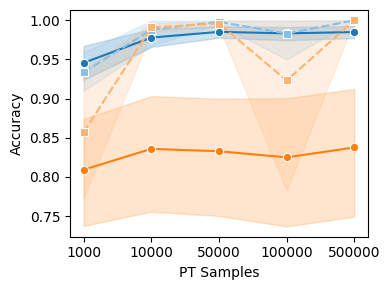

<Figure size 300x200 with 0 Axes>

### Transforms vs FT Samples

Compares the effect of same-vs-different transformations with the effect of the number of transer samples on transfer performance.

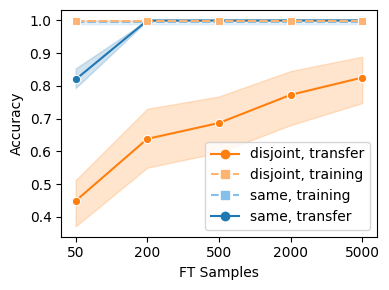

### Performance differences

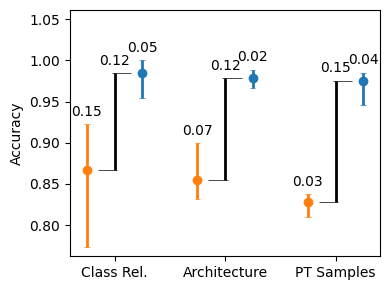

In [5]:
lp_figs = res_util.show_results(
    dataset_type="t2d",
    variation_categories=["class_rel", "arch", "pt_samples", "ft_samples"],
    variation_descriptions=VAR_CAT_DESCRIPTIONS,
    ft_type="lp",
    seeds=list(range(10)),
    object_cardinality="single_object",
    show_legend_for={"class_rel", "ft_samples"},
)

In [11]:
## Save figures
PLOTS_DIR = Path("../figures/how_important/tvo_t2d")
for key, fig in lp_figs.items():
    fig.savefig(PLOTS_DIR / f"t2d_{key}.pdf")

## Full FT

Fine-tune the entire model...

### 200 FT samples

...on 200 fine-tuning samples.

### Transforms vs Class Rel.

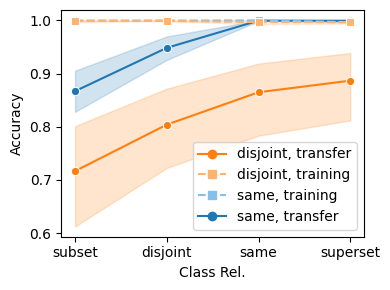

### Transforms vs Architecture

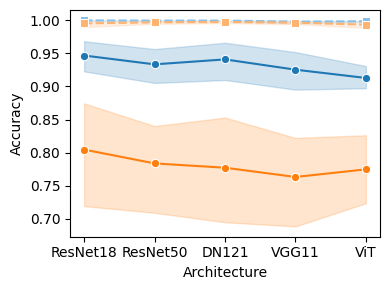

<Figure size 300x200 with 0 Axes>

### Transforms vs PT Samples

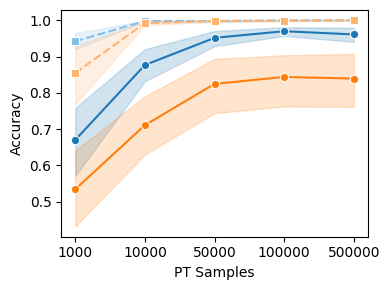

<Figure size 300x200 with 0 Axes>

### Transforms vs FT Samples

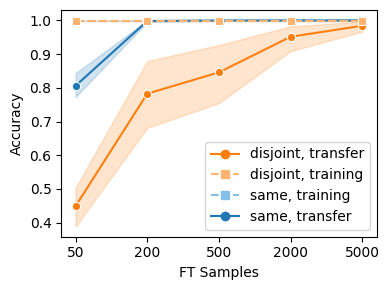

### Performance differences

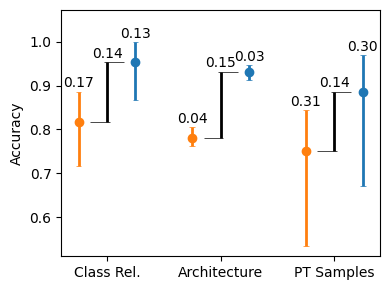

In [7]:
full_ft_200_figs = res_util.show_results(
    dataset_type="t2d",
    variation_categories=["class_rel", "arch", "pt_samples", "ft_samples"],
    ft_type="full-200",
    seeds=list(range(10)),
    object_cardinality="single_object",
    show_legend_for={"class_rel", "ft_samples"},
)

In [12]:
## Save figures
PLOTS_DIR = Path("../figures/how_important/tvo_full_ft/t2d")
for key, fig in full_ft_200_figs.items():
    fig.savefig(PLOTS_DIR / f"full_200_{key}.pdf")

### 2000 FT samples

...on 2000 fine-tuning samples.

### Transforms vs Class Rel.

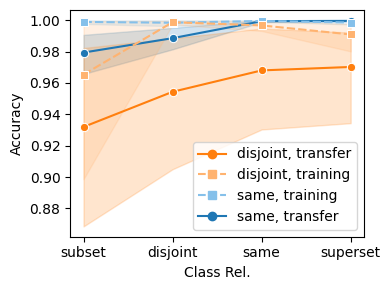

### Transforms vs Architecture

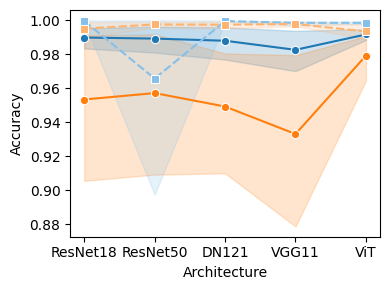

<Figure size 300x200 with 0 Axes>

### Transforms vs PT Samples

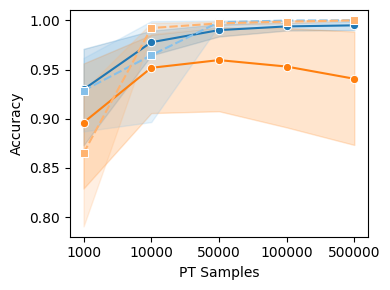

<Figure size 300x200 with 0 Axes>

### Performance differences

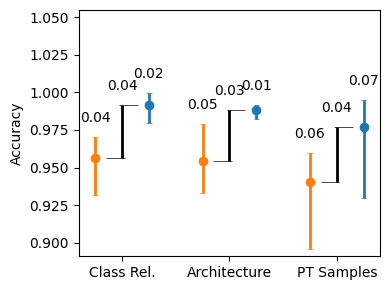

In [8]:
full_ft_2000_figs = res_util.show_results(
    dataset_type="t2d",
    variation_categories=["class_rel", "arch", "pt_samples"],
    ft_type="full-2000",
    seeds=list(range(10)),
    object_cardinality="single_object",
    show_legend_for={"class_rel", "ft_samples"},
)

In [13]:
## Save figures
PLOTS_DIR = Path("../figures/how_important/tvo_full_ft/t2d")
for key, fig in full_ft_2000_figs.items():
    fig.savefig(PLOTS_DIR / f"full_2000_{key}.pdf")

In [ ]:
# Upload
res_util.publish("t2d_eval")